# A2. Models of complex networks

### Implementation of models of complex networks.
Implement generators of complex networks for, at least, two of the following models of complex networks (sorted by increasing difficulty), which must include at least one of the two last ones (BA or CM):

- Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

- Watts-Strogatz (WS) small-world model

- Barabási & Albert (BA) preferential attachment model

- Configuration Model (CM)

In [ ]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np 
import networkx as nx
import math

In [ ]:
## PArams
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)
ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. k=3, 6, 10

In [489]:
class Circle:

    PI = 3.14

    def __init__(self, radius):
        self.radius = radius
        self.area = self.compute_area(self.radius)

    @staticmethod
    def compute_area(radius):
        return radius * (Circle.PI**2)
    
c = Circle(radius=5)
c.compute_area(c.radius)

49.298

In [522]:
## make a class for a Erdos-Renyi graph 
class ErdosRenyi:
    """
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    degrees : degrees (k), maximum degree per node 
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    """
    def __init__(self, n_nodes:int, degrees:int, probabilities:float, k:int=3) -> dict:
        self.nodes = n_nodes
        self.degrees = degrees
        self.proba = probabilities
        self.k = k
        self.graph  = self._generate_graph(nx.Graph(),self.nodes, self.proba)
        self.theoretical_values = round(self.proba * (self.nodes - 1),2)
        self.experimental_values = round((2.0 * len(self.graph.edges())) / self.nodes,2)
        self.deg_hist = self._get_degree_histogram(self.graph)
        self.exp_vals = self.deg_hist / sum(self.deg_hist) ## normalizing the histogram
        self.dir_to_save = "./imgs/ER/plots/" ## directory to save 
        
    ## define the generate_ER_graph function
    @staticmethod
    def _generate_graph(g, nodes:int, proba:float):
        ## instantiate an empty graph 
        #g = nx.Graph()
        ## add nodes to the graph
        g.add_nodes_from(range(nodes))
        ## iterate over the nodes and
        for node in range(0, nodes):
            ## generate the random value 
            rand_val = np.random.uniform(0,1)
            ## iterate over a possible link
            for edge in range(node+1, nodes):
                ## if a random value is less than the probability, add the link
                if rand_val < proba or proba == 1:
                    ## check the number of edges between the two nodes
                    g.add_edge(node, edge)
        ## assign the graph to the class
        return g
    
        ## define function to get the degree histogram
    @staticmethod
    def _get_degree_histogram(graph):
        ## calculate the degree history 
        return np.array(nx.degree_histogram(graph))
    
    
    ## plot the network 
    def _plot_graph(self, axis=None):
        """plots only the graph"""
        if self.graph:
            return nx.draw(self.graph,ax=axis)
    
    
    
    def _plot(self):
        ## plot the network & the corresponding statistics
        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
        _ = nx.draw(self.graph, node_color='blue', edge_color='red', ax=axs[0])
        ## ad a suptitle to the figure )
        fig.suptitle(f'Erdos-Renyi Graph with N = {self.nodes} and p = {self.proba}')
        ## plotting the Experimental values 
        axs[1].plot(self.exp_vals, label='Experimental Degree Distribution', marker='o',linestyle='dashdot', color='red') ## plot the experimental values
        axs[1].axvline(self.experimental_values, color='red', linestyle='--', label=f"Experimental values = {self.experimental_values}") ## plot the vertical line
        ## plotting the Theoretical values
        theo_to_plot = [math.exp(-self.theoretical_values)*self.theoretical_values**val/math.factorial(val) for val in range(len(self.deg_hist))]
        axs[1].plot(theo_to_plot, color='blue',marker='+',linestyle='dashed', label="Theoretical Degree Distribution") ## plot the theoretical values')
        axs[1].axvline(self.theoretical_values, color='blue', linestyle='--', label=f"Theoretical values = {self.theoretical_values}") ## plot the vertical line
        axs[1].set_title('Degree Distribution')
        plt.legend()
        plt.xlabel("Degrees")
        plt.ylabel("Probability of Degree [P(k)]")
        #plt.savefig(self.dir_to_save + f"ER_Theoretical_Actual_Distribution.png")
        plt.show()

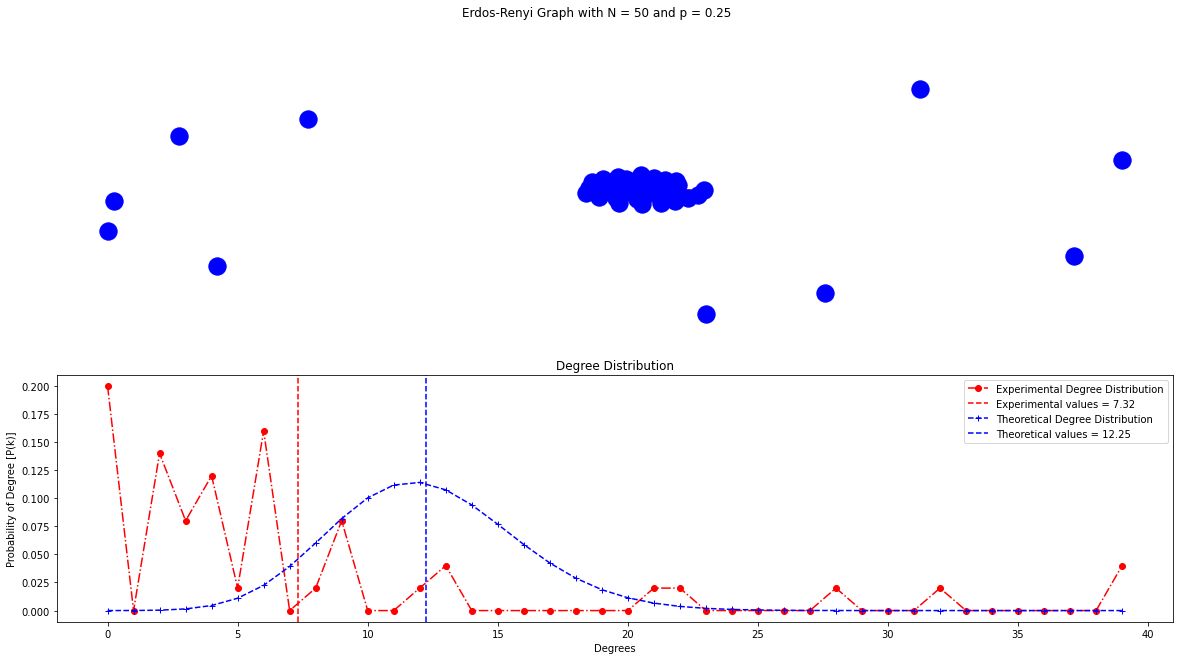

In [532]:
g = ErdosRenyi(n_nodes=50, degrees=3, probabilities=0.25, k=3)
#g._plot_graph()

### Plotting Degree Rank Plot & Degree Histogram

In [ ]:
G = g
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("./graph_imgs/plots/ER_graph_degree_plot.png")
plt.show()

### Loop for Delivery files

In [ ]:
## generate the plots and the matrix files to deliver 
nodes = 100
proba = 0.2
k = 3 ## fix this 
for node in [50, 100, 1000, 10000]:
    for probs in [0.1, 0.25, 0.5, 0.75, 0.9]:
        ## build it 
        g = ErdosRenyi(node, k, probs).generate_ER_graph()
        #nx.draw(g, with_labels=True)
        degs = dict(nx.degree(g))
        #_ = [print(f"Node: {i} has degree: {k}") for i,k in degs.items()]
        nx.draw(g, pos=nx.spring_layout(g))
        plt.title(f"Erdos-Renyi Graph with {node} nodes (k={k},p={probs})")
        #plt.hist(degs.values(), bins=range(0, max(degs.values())+1));plt.show()
        plt.savefig(f"./graph_imgs/ER_graph_{node}_{k}_{round(probs*100)}.png")
        plt.show()
        output = nx.to_numpy_matrix(g)
        np.save(f"./graphs/ER/{node}/ER_graph_{node}_{k}_{round(probs*100)}.npy", output)
        

## 2. Barabási & Albert (BA) preferential attachment model
BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

In [ ]:
## class for a Barabasi-Albert graph

class BarabasiAlbert:
    def __init__(self, n_nodes, m_edges, k_out):
        self.n_nodes = n_nodes
        self.m_edges = m_edges
        self.graph = None
        self.dir_to_save = "./graph_imgs/plots/"

In [ ]:
import random 
from sklearn.linear_model import LinearRegression
def BA_model(N, m0, m):
    G = nx.empty_graph(m0)
    for i in range(m0):     # generate a small connected net
        for j in range(m0):
            if j>i: G.add_edge(i,j)

    for h in range(m0,N):    # add new nodes
        G.add_node(h)
        k = nx.degree(G)
        ks = [x[1] for x in nx.degree(G)]
        ks.remove(ks[-1])
        ks = [sum(ks[:i+1]) for i in range(len(ks))]
        M = 1
        th = -1
        while M <= m:
            p = random.random()*ks[-1]
            for idx, i in enumerate(ks):
                if p < i+1 and p > i:
                    if th == idx:
                        break
                    else:
                        G.add_edge(h, idx)
                        th = idx
                        M += 1

    return G

G = BA_model(100,5,10)
#G = nx.barabasi_albert_graph(100,10)
pos = nx.spring_layout(G, k=0.2)
nx.draw(G, pos, node_size=100)
plt.show()

h = nx.degree_histogram(G)
h_ = [i for i in h if i>0]
dd = np.asarray([math.log(float(i)/sum(h_)) for i in h_])
d_ = np.asarray([math.log(i) for i in range(len(h)) if h[i]>0]).reshape((len(h_),1))
lr = LinearRegression()
lr.fit(d_, dd)
gamma = -lr.coef_

plt.scatter([math.exp(i) for i in d_], [math.exp(j) for j in dd],  color='black', label='Experimental distribution')
plt.plot([math.exp(i) for i in d_], [math.exp(j) for j in lr.predict(d_)], color='blue', linewidth=2, label='Estimated distribution')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.title('Estimated gamma: %f' % gamma)
plt.show()

nx.draw_circular(G)
plt.show()